## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

1. 試比較有 BN 在 Batch_size = 64, 128, 256, 512, 1024 下的差異

In [5]:
from keras.layers import BatchNormalization

def build_mlp1(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = [64, 128, 256, 512, 1024]
MOMENTUM = 0.95

In [7]:
results1 = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

for batch in BATCH_SIZE:
    model = build_mlp1(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=batch, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    tag = 'batch-%s' % str(batch)
    results1[tag] = {}
    
    # Collect results
    results1[tag]['train_loss'] = model.history.history["loss"]
    results1[tag]['valid_loss'] = model.history.history["val_loss"]
    results1[tag]['train_acc'] = model.history.history["acc"]
    results1[tag]['valid_acc'] = model.history.history["val_acc"]





_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512       
______

50000/50000 [==============================] - 18s 356us/step - loss: 0.6289 - acc: 0.7738 - val_loss: 1.8505 - val_acc: 0.4792
Epoch 39/50
50000/50000 [==============================] - 18s 361us/step - loss: 0.6236 - acc: 0.7753 - val_loss: 1.8699 - val_acc: 0.4795
Epoch 40/50
50000/50000 [==============================] - 18s 352us/step - loss: 0.6074 - acc: 0.7845 - val_loss: 1.8493 - val_acc: 0.4797
Epoch 41/50
50000/50000 [==============================] - 17s 331us/step - loss: 0.5952 - acc: 0.7887 - val_loss: 1.9269 - val_acc: 0.4719
Epoch 42/50
50000/50000 [==============================] - 18s 364us/step - loss: 0.5714 - acc: 0.7965 - val_loss: 1.9221 - val_acc: 0.4769
Epoch 43/50
50000/50000 [==============================] - 18s 357us/step - loss: 0.5581 - acc: 0.8021 - val_loss: 1.8858 - val_acc: 0.4958
Epoch 44/50
50000/50000 [==============================] - 18s 359us/step - loss: 0.5545 - acc: 0.8029 - val_loss: 1.9591 - val_acc: 0.4745
Epoch 45/50
50000/50000 [=======

50000/50000 [==============================] - 23s 466us/step - loss: 0.4399 - acc: 0.8485 - val_loss: 2.2405 - val_acc: 0.4644
Epoch 37/50
50000/50000 [==============================] - 23s 455us/step - loss: 0.4294 - acc: 0.8506 - val_loss: 2.2025 - val_acc: 0.4664
Epoch 38/50
50000/50000 [==============================] - 25s 492us/step - loss: 0.4023 - acc: 0.8628 - val_loss: 2.2839 - val_acc: 0.4569
Epoch 39/50
50000/50000 [==============================] - 25s 503us/step - loss: 0.3913 - acc: 0.8660 - val_loss: 2.1811 - val_acc: 0.4710
Epoch 40/50
50000/50000 [==============================] - 24s 487us/step - loss: 0.3769 - acc: 0.8683 - val_loss: 2.2228 - val_acc: 0.4549
Epoch 41/50
50000/50000 [==============================] - 23s 459us/step - loss: 0.3698 - acc: 0.8733 - val_loss: 2.1844 - val_acc: 0.4785
Epoch 42/50
50000/50000 [==============================] - 22s 439us/step - loss: 0.3553 - acc: 0.8772 - val_loss: 2.3209 - val_acc: 0.4657
Epoch 43/50
50000/50000 [=======

50000/50000 [==============================] - 12s 250us/step - loss: 0.3978 - acc: 0.8736 - val_loss: 2.0271 - val_acc: 0.4642
Epoch 35/50
50000/50000 [==============================] - 13s 261us/step - loss: 0.3779 - acc: 0.8810 - val_loss: 1.9994 - val_acc: 0.4750
Epoch 36/50
50000/50000 [==============================] - 13s 255us/step - loss: 0.3654 - acc: 0.8828 - val_loss: 2.0422 - val_acc: 0.4677
Epoch 37/50
50000/50000 [==============================] - 14s 280us/step - loss: 0.3488 - acc: 0.8911 - val_loss: 2.0690 - val_acc: 0.4840
Epoch 38/50
50000/50000 [==============================] - 14s 273us/step - loss: 0.3256 - acc: 0.9007 - val_loss: 2.0923 - val_acc: 0.4629
Epoch 39/50
50000/50000 [==============================] - 13s 265us/step - loss: 0.3103 - acc: 0.9053 - val_loss: 2.1344 - val_acc: 0.4696
Epoch 40/50
50000/50000 [==============================] - 17s 342us/step - loss: 0.2914 - acc: 0.9131 - val_loss: 2.1340 - val_acc: 0.4742
Epoch 41/50
50000/50000 [=======

50000/50000 [==============================] - 12s 247us/step - loss: 0.5545 - acc: 0.8279 - val_loss: 1.6683 - val_acc: 0.4870
Epoch 33/50
50000/50000 [==============================] - 12s 239us/step - loss: 0.5316 - acc: 0.8365 - val_loss: 1.7142 - val_acc: 0.4860
Epoch 34/50
50000/50000 [==============================] - 12s 240us/step - loss: 0.5052 - acc: 0.8471 - val_loss: 1.7228 - val_acc: 0.4868
Epoch 35/50
50000/50000 [==============================] - 12s 239us/step - loss: 0.4826 - acc: 0.8547 - val_loss: 1.7559 - val_acc: 0.4846
Epoch 36/50
50000/50000 [==============================] - 11s 227us/step - loss: 0.4638 - acc: 0.8617 - val_loss: 1.7598 - val_acc: 0.4779
Epoch 37/50
50000/50000 [==============================] - 11s 224us/step - loss: 0.4373 - acc: 0.8721 - val_loss: 1.8461 - val_acc: 0.4731
Epoch 38/50
50000/50000 [==============================] - 12s 248us/step - loss: 0.4206 - acc: 0.8794 - val_loss: 1.8144 - val_acc: 0.4808
Epoch 39/50
50000/50000 [=======

50000/50000 [==============================] - 13s 265us/step - loss: 0.8567 - acc: 0.7164 - val_loss: 1.4855 - val_acc: 0.4983
Epoch 31/50
50000/50000 [==============================] - 13s 268us/step - loss: 0.8387 - acc: 0.7245 - val_loss: 1.5007 - val_acc: 0.4963
Epoch 32/50
50000/50000 [==============================] - 15s 303us/step - loss: 0.8166 - acc: 0.7338 - val_loss: 1.5014 - val_acc: 0.4960
Epoch 33/50
50000/50000 [==============================] - 13s 253us/step - loss: 0.7984 - acc: 0.7417 - val_loss: 1.5038 - val_acc: 0.5005
Epoch 34/50
50000/50000 [==============================] - 12s 249us/step - loss: 0.7788 - acc: 0.7483 - val_loss: 1.5124 - val_acc: 0.4906
Epoch 35/50
50000/50000 [==============================] - 12s 233us/step - loss: 0.7588 - acc: 0.7584 - val_loss: 1.5243 - val_acc: 0.4929
Epoch 36/50
50000/50000 [==============================] - 12s 231us/step - loss: 0.7409 - acc: 0.7646 - val_loss: 1.5361 - val_acc: 0.4953
Epoch 37/50
50000/50000 [=======

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


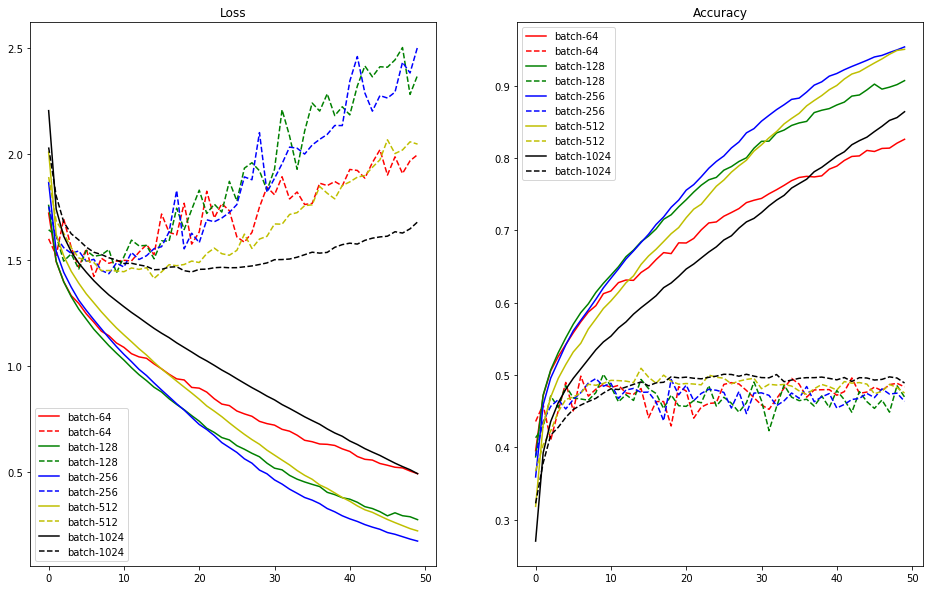

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

color_bar = ['r', 'g', 'b', 'y', 'k'] 
plt.figure(figsize=(16, 10))

for i, tag in enumerate(results1.keys()):
    plt.subplot(121)
    plt.plot(range(len(results1[tag]['train_loss'])), results1[tag]['train_loss'], '-', label=tag, color=color_bar[i])
    plt.plot(range(len(results1[tag]['valid_loss'])), results1[tag]['valid_loss'], '--', label=tag, color=color_bar[i])
    plt.title('Loss')
    plt.legend()
    
    plt.subplot(122)
    plt.plot(range(len(results1[tag]['train_acc'])), results1[tag]['train_acc'], '-', label=tag, color=color_bar[i])
    plt.plot(range(len(results1[tag]['valid_acc'])), results1[tag]['valid_acc'], '--', label=tag, color=color_bar[i])
    plt.title('Accuracy')
    plt.legend()

plt.show()

2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果

In [14]:
from keras.layers import BatchNormalization

def build_mlp2(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = BatchNormalization()(input_layer)
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
        else:
            x = BatchNormalization()(x)
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [15]:
results2 = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

for batch in BATCH_SIZE:
    model = build_mlp2(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=batch, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    tag = 'batch-%s' % str(batch)
    results2[tag] = {}
    
    # Collect results
    results2[tag]['train_loss'] = model.history.history["loss"]
    results2[tag]['valid_loss'] = model.history.history["val_loss"]
    results2[tag]['train_acc'] = model.history.history["acc"]
    results2[tag]['valid_acc'] = model.history.history["val_acc"]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
batch_normalization_17 (Batc (None, 3072)              12288     
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_18 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_19 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
__________

50000/50000 [==============================] - 47s 938us/step - loss: 0.1379 - acc: 0.9522 - val_loss: 2.4316 - val_acc: 0.5293
Epoch 49/50
50000/50000 [==============================] - 44s 887us/step - loss: 0.1298 - acc: 0.9559 - val_loss: 2.4486 - val_acc: 0.5302
Epoch 50/50
50000/50000 [==============================] - 44s 882us/step - loss: 0.1273 - acc: 0.9553 - val_loss: 2.4881 - val_acc: 0.5301
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
batch_normalization_20 (Batc (None, 3072)              12288     
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_21 (Batc (None, 512)               2048     

50000/50000 [==============================] - 29s 574us/step - loss: 0.0657 - acc: 0.9814 - val_loss: 2.6243 - val_acc: 0.5148
Epoch 47/50
50000/50000 [==============================] - 28s 563us/step - loss: 0.0703 - acc: 0.9800 - val_loss: 2.5895 - val_acc: 0.5196
Epoch 48/50
50000/50000 [==============================] - 28s 560us/step - loss: 0.0675 - acc: 0.9800 - val_loss: 2.6195 - val_acc: 0.5248
Epoch 49/50
50000/50000 [==============================] - 28s 558us/step - loss: 0.0585 - acc: 0.9832 - val_loss: 2.6686 - val_acc: 0.5184
Epoch 50/50
50000/50000 [==============================] - 28s 560us/step - loss: 0.0652 - acc: 0.9808 - val_loss: 2.6986 - val_acc: 0.5206
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
batch_normalization_23 (Batc (None, 3072)       

50000/50000 [==============================] - 22s 436us/step - loss: 0.0548 - acc: 0.9910 - val_loss: 2.3838 - val_acc: 0.5081
Epoch 45/50
50000/50000 [==============================] - 22s 432us/step - loss: 0.0528 - acc: 0.9922 - val_loss: 2.4200 - val_acc: 0.5107
Epoch 46/50
50000/50000 [==============================] - 22s 433us/step - loss: 0.0452 - acc: 0.9938 - val_loss: 2.4305 - val_acc: 0.5075
Epoch 47/50
50000/50000 [==============================] - 22s 432us/step - loss: 0.0438 - acc: 0.9940 - val_loss: 2.4562 - val_acc: 0.5078
Epoch 48/50
50000/50000 [==============================] - 22s 434us/step - loss: 0.0447 - acc: 0.9931 - val_loss: 2.4943 - val_acc: 0.5062
Epoch 49/50
50000/50000 [==============================] - 22s 435us/step - loss: 0.0402 - acc: 0.9939 - val_loss: 2.5054 - val_acc: 0.5108
Epoch 50/50
50000/50000 [==============================] - 22s 444us/step - loss: 0.0342 - acc: 0.9961 - val_loss: 2.5172 - val_acc: 0.5090
________________________________

50000/50000 [==============================] - 32s 643us/step - loss: 0.1730 - acc: 0.9718 - val_loss: 1.9514 - val_acc: 0.4977
Epoch 43/50
50000/50000 [==============================] - 31s 621us/step - loss: 0.1600 - acc: 0.9750 - val_loss: 1.9752 - val_acc: 0.5006
Epoch 44/50
50000/50000 [==============================] - 30s 596us/step - loss: 0.1479 - acc: 0.9782 - val_loss: 2.0075 - val_acc: 0.5009
Epoch 45/50
50000/50000 [==============================] - 27s 548us/step - loss: 0.1355 - acc: 0.9822 - val_loss: 2.0469 - val_acc: 0.4956
Epoch 46/50
50000/50000 [==============================] - 27s 545us/step - loss: 0.1238 - acc: 0.9848 - val_loss: 2.0562 - val_acc: 0.4984
Epoch 47/50
50000/50000 [==============================] - 28s 560us/step - loss: 0.1172 - acc: 0.9852 - val_loss: 2.1009 - val_acc: 0.4969
Epoch 48/50
50000/50000 [==============================] - 28s 564us/step - loss: 0.1063 - acc: 0.9885 - val_loss: 2.1197 - val_acc: 0.4990
Epoch 49/50
50000/50000 [=======

50000/50000 [==============================] - 27s 546us/step - loss: 0.6444 - acc: 0.8063 - val_loss: 1.4687 - val_acc: 0.5160
Epoch 41/50
50000/50000 [==============================] - 28s 550us/step - loss: 0.6254 - acc: 0.8139 - val_loss: 1.4804 - val_acc: 0.5174
Epoch 42/50
50000/50000 [==============================] - 28s 558us/step - loss: 0.6062 - acc: 0.8227 - val_loss: 1.4866 - val_acc: 0.5155
Epoch 43/50
50000/50000 [==============================] - 27s 549us/step - loss: 0.5875 - acc: 0.8291 - val_loss: 1.4983 - val_acc: 0.5156
Epoch 44/50
50000/50000 [==============================] - 28s 560us/step - loss: 0.5683 - acc: 0.8373 - val_loss: 1.5045 - val_acc: 0.5149
Epoch 45/50
50000/50000 [==============================] - 28s 563us/step - loss: 0.5504 - acc: 0.8444 - val_loss: 1.5126 - val_acc: 0.5133
Epoch 46/50
50000/50000 [==============================] - 28s 563us/step - loss: 0.5317 - acc: 0.8520 - val_loss: 1.5220 - val_acc: 0.5169
Epoch 47/50
50000/50000 [=======

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


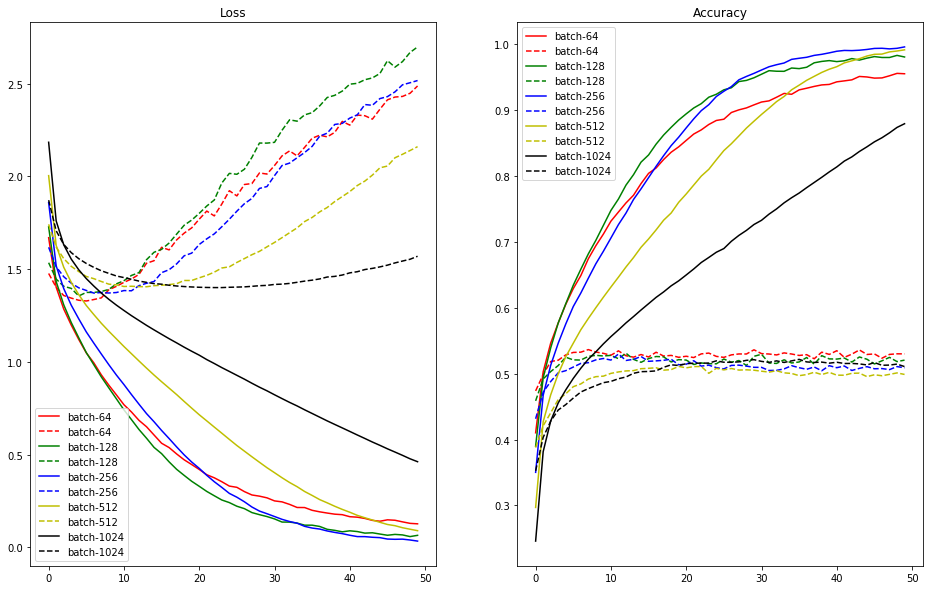

In [16]:
plt.figure(figsize=(16, 10))

for i, tag in enumerate(results2.keys()):
    plt.subplot(121)
    plt.plot(range(len(results2[tag]['train_loss'])), results2[tag]['train_loss'], '-', label=tag, color=color_bar[i])
    plt.plot(range(len(results2[tag]['valid_loss'])), results2[tag]['valid_loss'], '--', label=tag, color=color_bar[i])
    plt.title('Loss')
    plt.legend()
    
    plt.subplot(122)
    plt.plot(range(len(results2[tag]['train_acc'])), results2[tag]['train_acc'], '-', label=tag, color=color_bar[i])
    plt.plot(range(len(results2[tag]['valid_acc'])), results2[tag]['valid_acc'], '--', label=tag, color=color_bar[i])
    plt.title('Accuracy')
    plt.legend()

plt.show()

3. 請於 BN 放在 Input Layer 後，並比較結果

In [17]:
def build_mlp3(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = BatchNormalization()(input_layer)
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [18]:
results3 = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

for batch in BATCH_SIZE:
    model = build_mlp3(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=batch, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    tag = 'batch-%s' % str(batch)
    results3[tag] = {}
    
    # Collect results
    results3[tag]['train_loss'] = model.history.history["loss"]
    results3[tag]['valid_loss'] = model.history.history["val_loss"]
    results3[tag]['train_acc'] = model.history.history["acc"]
    results3[tag]['valid_acc'] = model.history.history["val_acc"]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
batch_normalization_32 (Batc (None, 3072)              12288     
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,751,178
Trainable params: 1,745,034
Non-trainable params: 6,144
______________________________________________________________

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 39s 783us/step - loss: 1.7746 - acc: 0.3695 - val_loss: 1.5807 - val_acc: 0.4486
Epoch 2/50
50000/50000 [==============================] - 33s 651us/step - loss: 1.5100 - acc: 0.4677 - val_loss: 1.4934 - val_acc: 0.4765
Epoch 3/50
50000/50000 [==============================] - 34s 673us/step - loss: 1.3920 - acc: 0.5126 - val_loss: 1.4363 - val_acc: 0.4931
Epoch 4/50
50000/50000 [==============================] - 33s 653us/step - loss: 1.3036 - acc: 0.5450 - val_loss: 1.4118 - val_acc: 0.4995
Epoch 5/50
50000/50000 [==============================] - 33s 657us/step - loss: 1.2251 - acc: 0.5743 - val_loss: 1.3823 - val_acc: 0.5124
Epoch 6/50
50000/50000 [==============================] - 33s 654us/step - loss: 1.1542 - acc: 0.5988 - val_loss: 1.3725 - val_acc: 0.5173
Epoch 7/50
50000/50000 [==============================] - 31s 627us/step - loss: 1.0899 - acc: 0.6240 - val_loss: 1.

50000/50000 [==============================] - 31s 626us/step - loss: 1.8503 - acc: 0.3446 - val_loss: 1.6517 - val_acc: 0.4157
Epoch 2/50
50000/50000 [==============================] - 27s 537us/step - loss: 1.5769 - acc: 0.4451 - val_loss: 1.5531 - val_acc: 0.4532
Epoch 3/50
50000/50000 [==============================] - 27s 539us/step - loss: 1.4697 - acc: 0.4869 - val_loss: 1.4932 - val_acc: 0.4808
Epoch 4/50
50000/50000 [==============================] - 27s 536us/step - loss: 1.3911 - acc: 0.5156 - val_loss: 1.4593 - val_acc: 0.4927
Epoch 5/50
50000/50000 [==============================] - 27s 536us/step - loss: 1.3247 - acc: 0.5374 - val_loss: 1.4274 - val_acc: 0.4978
Epoch 6/50
50000/50000 [==============================] - 26s 529us/step - loss: 1.2675 - acc: 0.5603 - val_loss: 1.4086 - val_acc: 0.5128
Epoch 7/50
50000/50000 [==============================] - 26s 528us/step - loss: 1.2138 - acc: 0.5807 - val_loss: 1.3901 - val_acc: 0.5142
Epoch 8/50
50000/50000 [==============

50000/50000 [==============================] - 29s 581us/step - loss: 2.0169 - acc: 0.2806 - val_loss: 1.7935 - val_acc: 0.3622
Epoch 2/50
50000/50000 [==============================] - 24s 489us/step - loss: 1.7140 - acc: 0.3927 - val_loss: 1.6638 - val_acc: 0.4167
Epoch 3/50
50000/50000 [==============================] - 24s 487us/step - loss: 1.6075 - acc: 0.4355 - val_loss: 1.6042 - val_acc: 0.4341
Epoch 4/50
50000/50000 [==============================] - 24s 487us/step - loss: 1.5399 - acc: 0.4605 - val_loss: 1.5559 - val_acc: 0.4495
Epoch 5/50
50000/50000 [==============================] - 24s 488us/step - loss: 1.4836 - acc: 0.4811 - val_loss: 1.5221 - val_acc: 0.4635
Epoch 6/50
50000/50000 [==============================] - 25s 490us/step - loss: 1.4353 - acc: 0.4996 - val_loss: 1.4974 - val_acc: 0.4733
Epoch 7/50
50000/50000 [==============================] - 25s 492us/step - loss: 1.3950 - acc: 0.5153 - val_loss: 1.4738 - val_acc: 0.4775
Epoch 8/50
50000/50000 [==============

50000/50000 [==============================] - 87s 2ms/step - loss: 2.2158 - acc: 0.2090 - val_loss: 1.9674 - val_acc: 0.3068
Epoch 2/50
50000/50000 [==============================] - 18s 366us/step - loss: 1.8709 - acc: 0.3421 - val_loss: 1.8076 - val_acc: 0.3671
Epoch 3/50
50000/50000 [==============================] - 17s 342us/step - loss: 1.7481 - acc: 0.3874 - val_loss: 1.7315 - val_acc: 0.3925
Epoch 4/50
50000/50000 [==============================] - 18s 351us/step - loss: 1.6779 - acc: 0.4136 - val_loss: 1.6801 - val_acc: 0.4113
Epoch 5/50
50000/50000 [==============================] - 18s 351us/step - loss: 1.6267 - acc: 0.4323 - val_loss: 1.6435 - val_acc: 0.4271
Epoch 6/50
50000/50000 [==============================] - 19s 387us/step - loss: 1.5866 - acc: 0.4453 - val_loss: 1.6143 - val_acc: 0.4362
Epoch 7/50
50000/50000 [==============================] - 26s 522us/step - loss: 1.5514 - acc: 0.4612 - val_loss: 1.5887 - val_acc: 0.4460
Epoch 8/50
50000/50000 [================

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


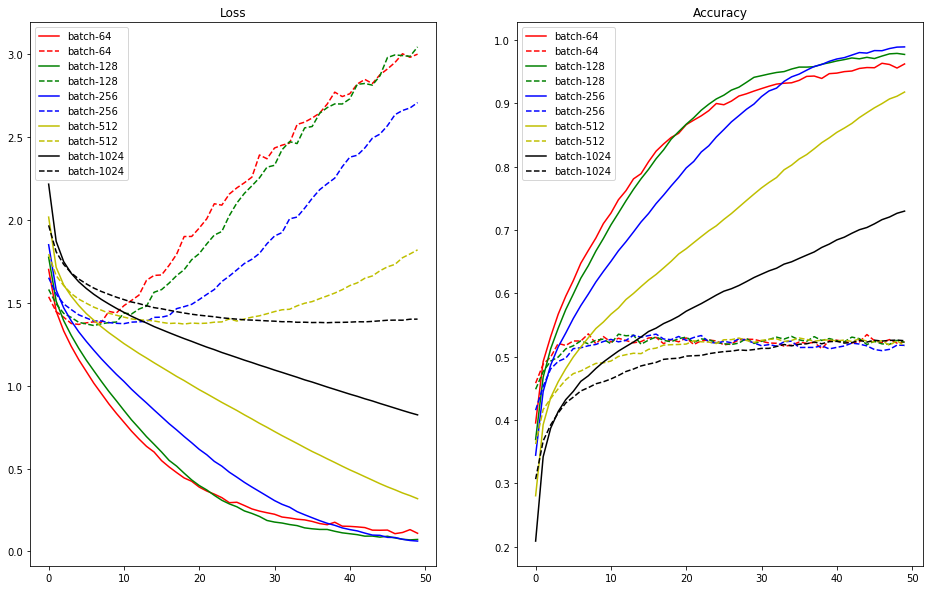

In [19]:
plt.figure(figsize=(16, 10))

for i, tag in enumerate(results3.keys()):
    plt.subplot(121)
    plt.plot(range(len(results3[tag]['train_loss'])), results3[tag]['train_loss'], '-', label=tag, color=color_bar[i])
    plt.plot(range(len(results3[tag]['valid_loss'])), results3[tag]['valid_loss'], '--', label=tag, color=color_bar[i])
    plt.title('Loss')
    plt.legend()
    
    plt.subplot(122)
    plt.plot(range(len(results3[tag]['train_acc'])), results3[tag]['train_acc'], '-', label=tag, color=color_bar[i])
    plt.plot(range(len(results3[tag]['valid_acc'])), results3[tag]['valid_acc'], '--', label=tag, color=color_bar[i])
    plt.title('Accuracy')
    plt.legend()

plt.show()